In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import cytograph as cg
import cytograph.visualization as cgplot
import shoji

In [2]:
db = shoji.connect()

In [3]:
ws = db.builds.sten.humandev20220523.BrainBasic3
xy = ws.Embedding[:]
labels = ws.Clusters[:]
age = ws.Age[:]
regions = ws.Region[:]
subregions = ws.Subregion[:]
pdgfra = ws.Expression[:, ws.Gene == "PDGFRA"].flatten()
cdk1 = ws.Expression[:, ws.Gene == "CDK1"].flatten()

# Colors for the human atlas papers

Let's try to use consistent color schemes across figures and even between the two papers. Cytograph-shoji now includes a class `Colorizer` that can be used to generate good-looking colors for categorical data (such as names of cell classes) as well as numerical data (such as age). 

**@Kim**: you would have to adapt the class (e.g. when you have a different set of regions defined) and move it over to old cytograph. But let's try to keep the colors reasonably consistent.

`Colorizer` currently defines these color schemes: **colors18**, **colors75**, **tube**, **age**, **regions**, **subregions** and **classes**

## 1. Colors for arbitrary sets (e.g. clusters)

Use one of these color schemes when showing arbitrary sets of features, such as clusters, and you just need them to be distinct

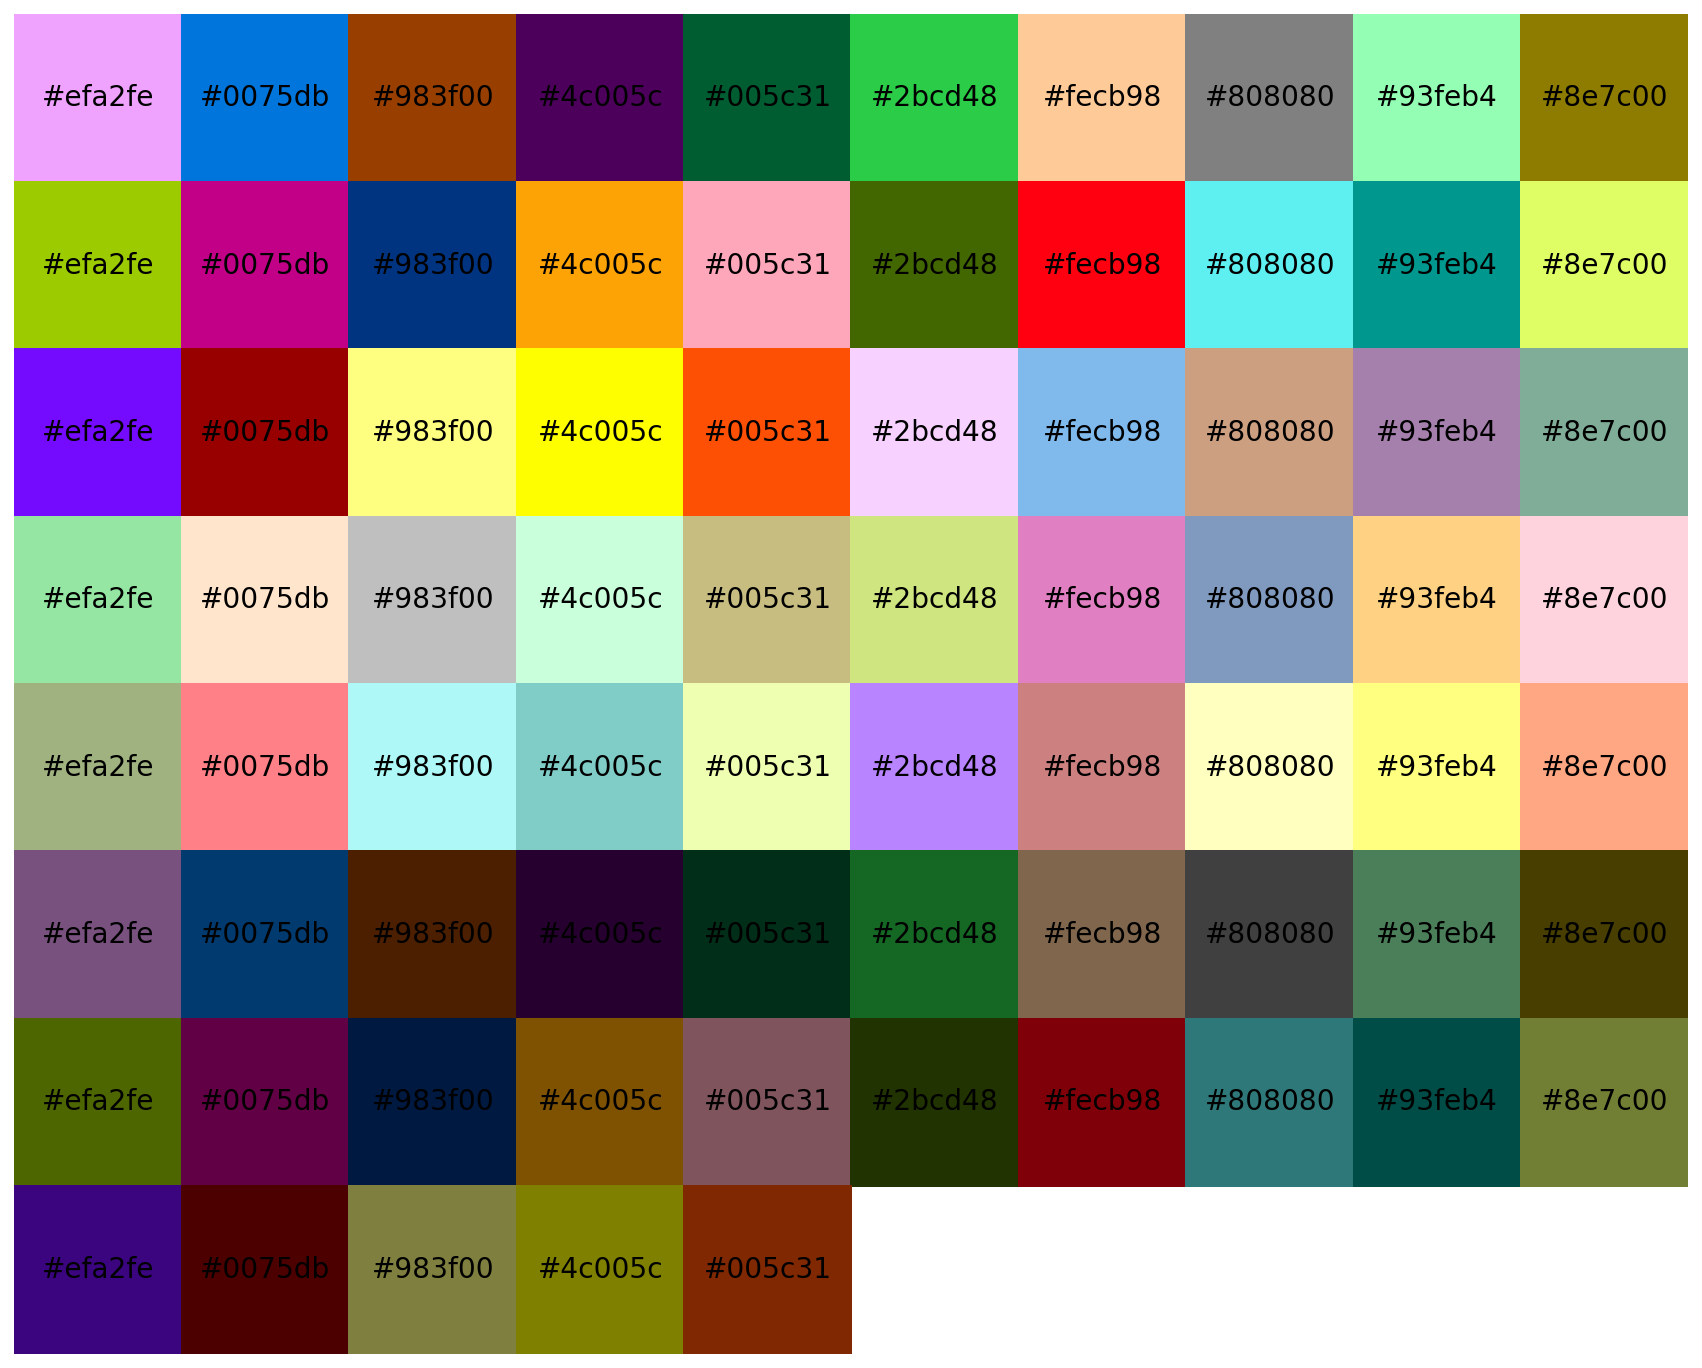

In [4]:
# colors75: our standard palette for very large numbers of distinct categories (e.g. clusters), derived from color alphabet
cgplot.Colorizer("colors75").plot()

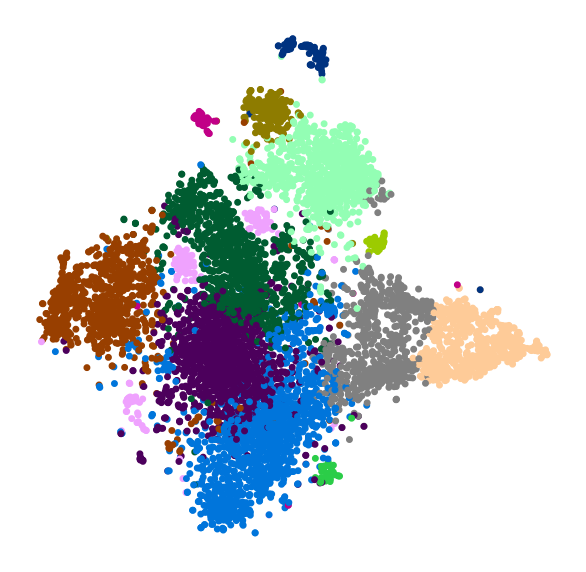

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(xy[:,0], xy[:,1], c=cgplot.Colorizer("colors75").fit_transform(labels),s=6)
plt.axis("off")
None

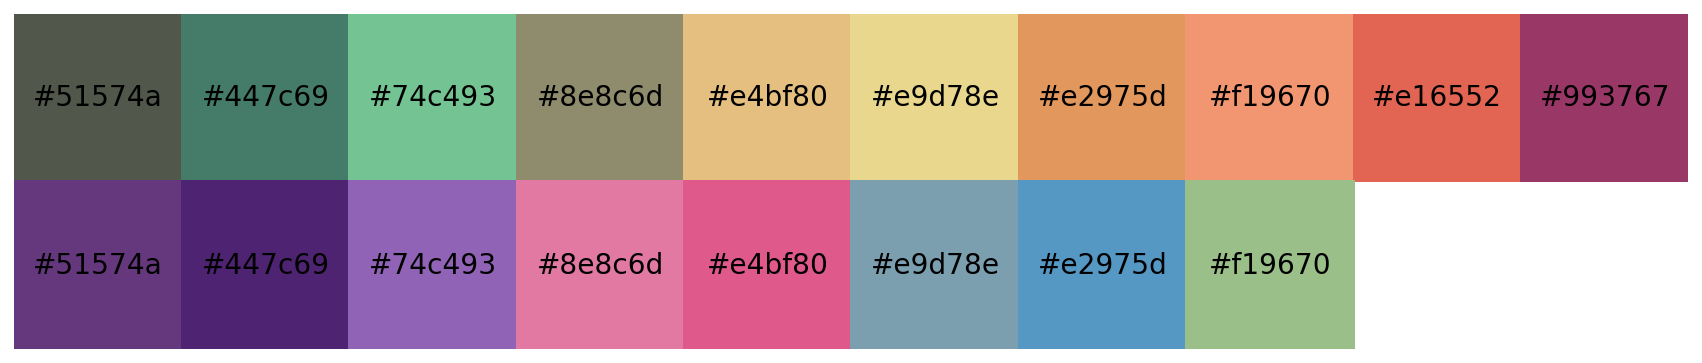

In [6]:
# colors18: a set of beautiful colors that work well together, but not the most distinguishable colors necessarily
cgplot.Colorizer("colors18").plot()

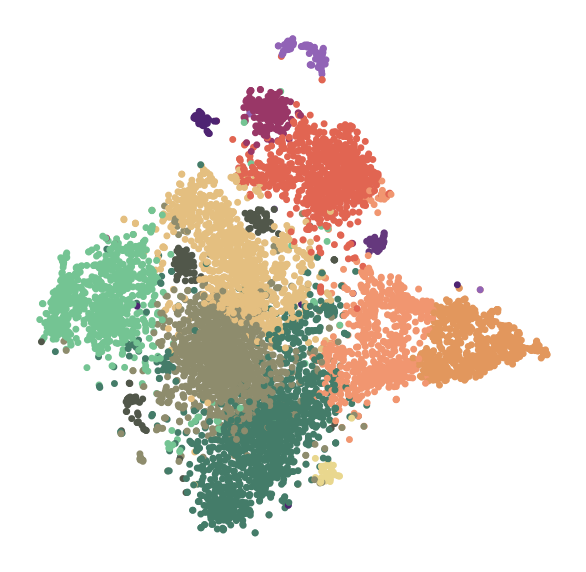

In [7]:
plt.figure(figsize=(5, 5))
plt.scatter(xy[:,0], xy[:,1], c=cgplot.Colorizer("colors18").fit_transform(labels),s=6)
plt.axis("off")
None

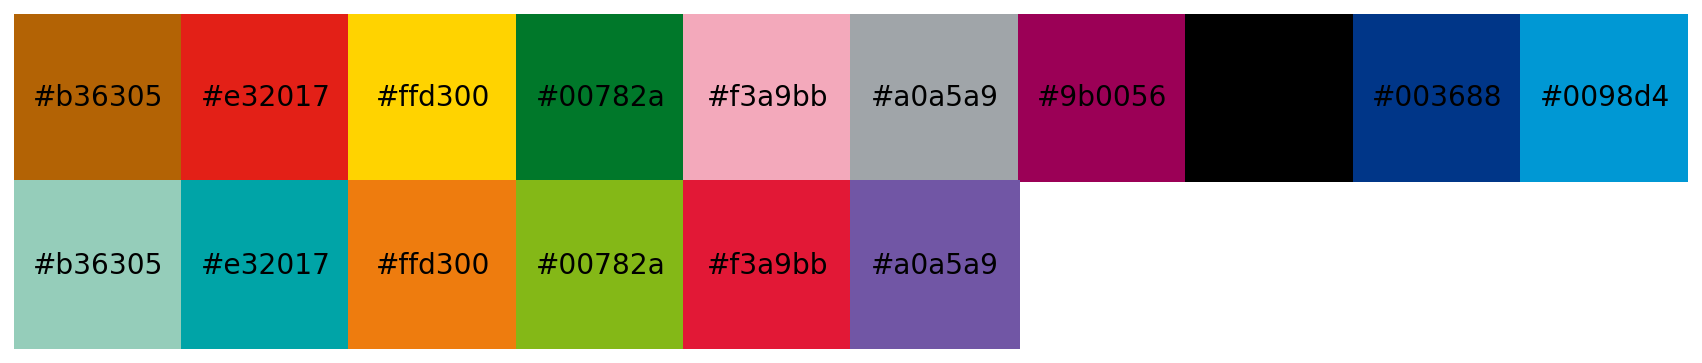

In [8]:
# tube: from the London subway map, excellent for small sets (up to 16 distinct items)
cgplot.Colorizer("tube").plot()

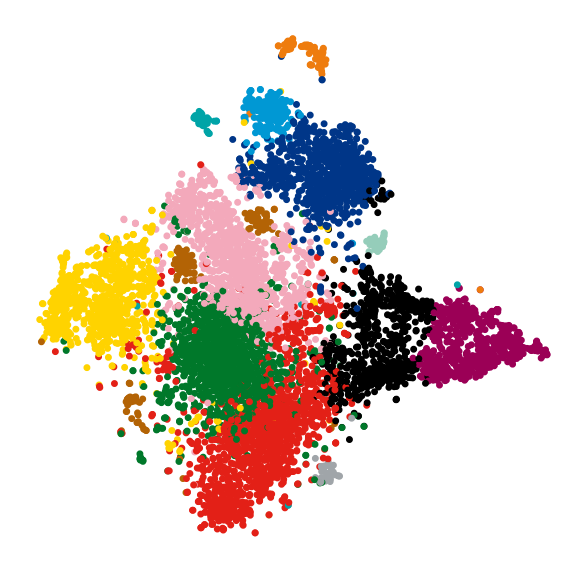

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(xy[:,0], xy[:,1], c=cgplot.Colorizer("tube").fit_transform(labels),s=6)
plt.axis("off")
None

The `cgplot.scatterc()` (for categorical data) function knows about color schemes, so you can just name a scheme to use it:

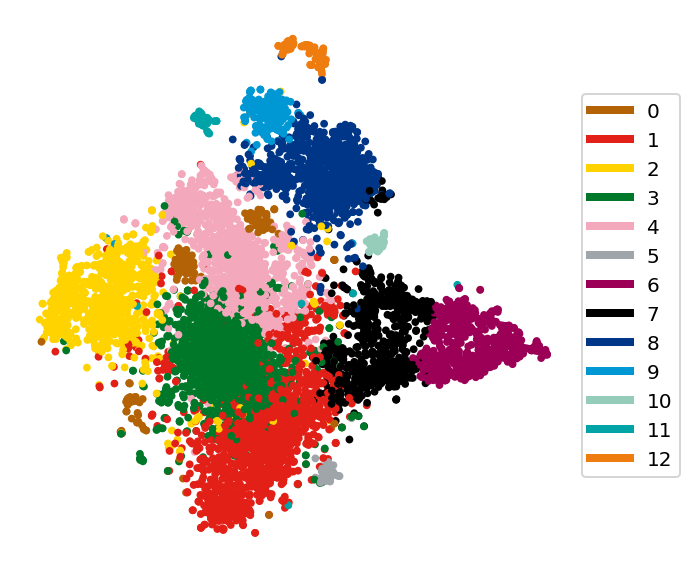

In [10]:
plt.figure(figsize=(5, 5))
cgplot.scatterc(xy, c=labels, colors="tube")
plt.axis("off")
None

### Caveats and pitfalls

Sometimes you want to plot several different datasets with consistent colors, but not all datasets contain all the possible values. In such cases, the colors may shift unless you take care to define them first using `.fit()`.

For example, say you have anatomical regions named 'Forebrain', 'Midbrain', 'Hindbrain', and two datasets where the second dataset does not contain any 'Midbrain'. Here's what that might look like:

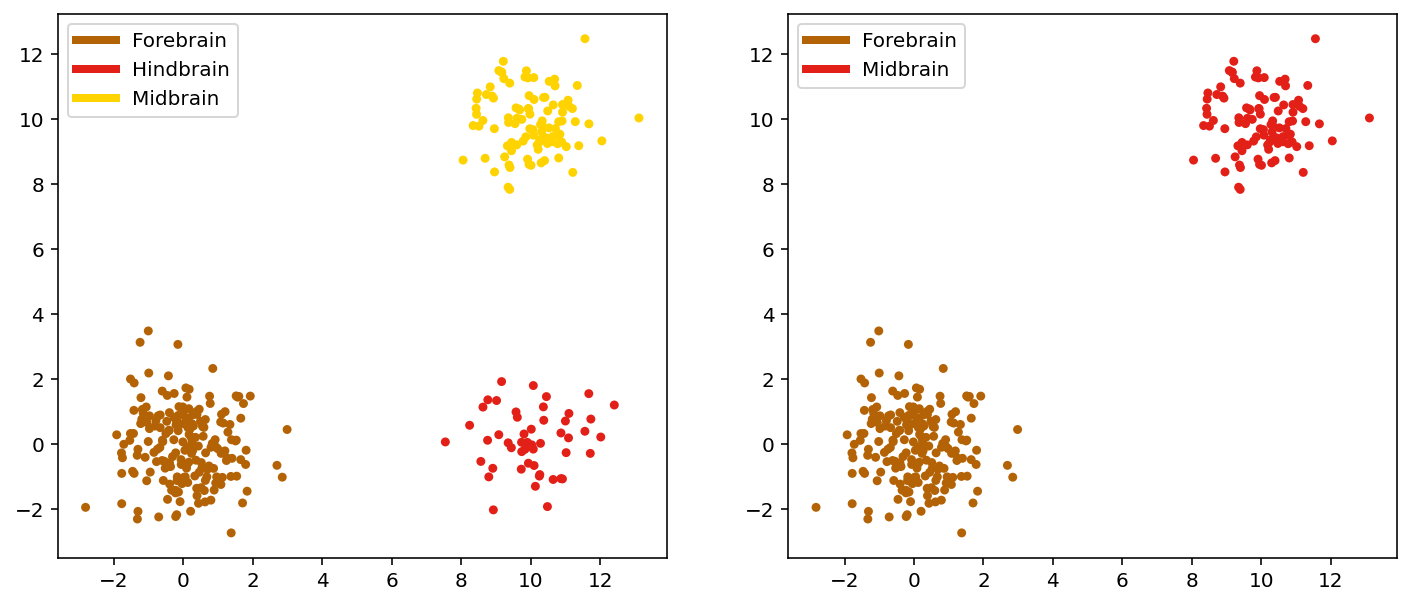

In [11]:
data1 = np.concatenate([
    np.random.multivariate_normal([0,0], [[1,0],[0,1]], size=200),
    np.random.multivariate_normal([10,10], [[1,0],[0,1]], size=100),
    np.random.multivariate_normal([10,0], [[1,0],[0,1]], size=50)])
regions1 = np.array(["Forebrain"] * 200 + ["Midbrain"] * 100 + ["Hindbrain"] * 50)
data2 = data1[:300]
regions2 = regions1[:300]
plt.figure(figsize=(12, 5))
plt.subplot(121)
cgplot.scatterc(data1, c=regions1, colors="tube", s=20, legend='upper left')
plt.subplot(122)
cgplot.scatterc(data2, c=regions2, colors="tube", s=20, legend='upper left')

Notice how the colors changed, because the second colorizer does not know about the 'Hindbrain' category. The solution is to create a single Colorizer, fit it to the dataset that contains all 
categories, and then pass this to the scatterc function:

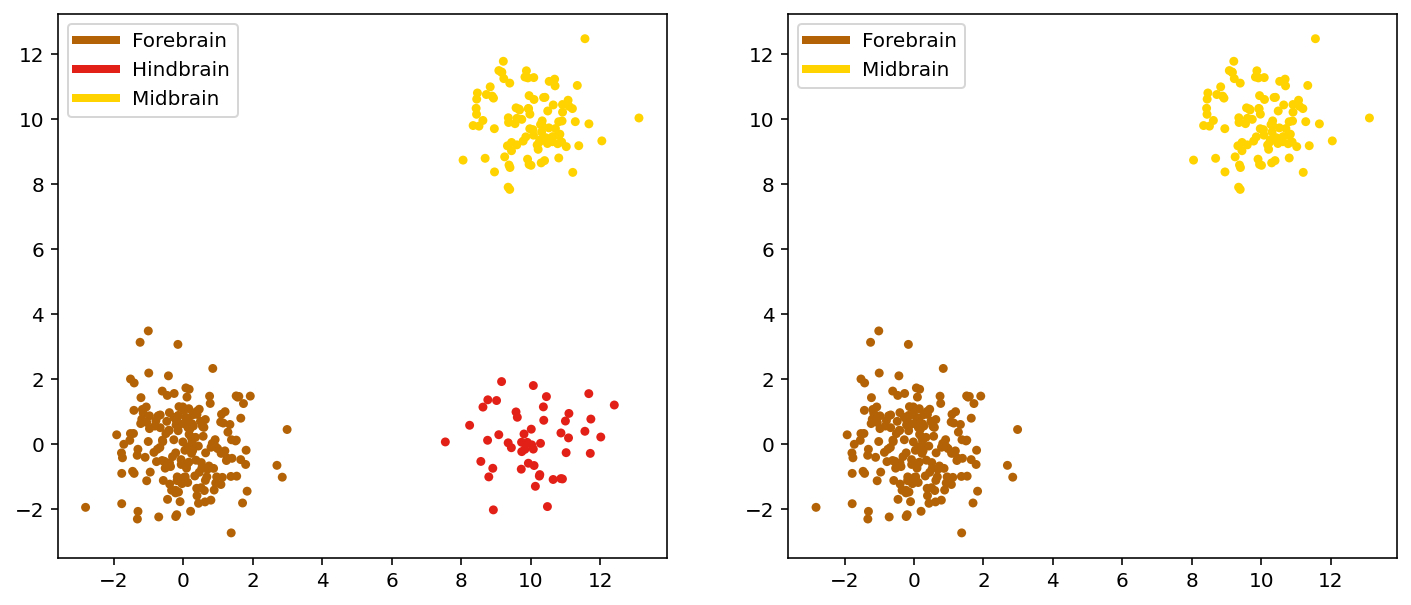

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
colorizer = cgplot.Colorizer("tube").fit(regions1)
cgplot.scatterc(data1, c=regions1, colors=colorizer, s=20, legend='upper left')
plt.subplot(122)
cgplot.scatterc(data2, c=regions2, colors=colorizer, s=20, legend='upper left')

## 2. Colors for named sets

When plotting categorical data, it's important to be consistent between figures so the reader can learn what the colors mean.

We define these color schemes for standard attributes: **regions**, **subregions** and **classes**

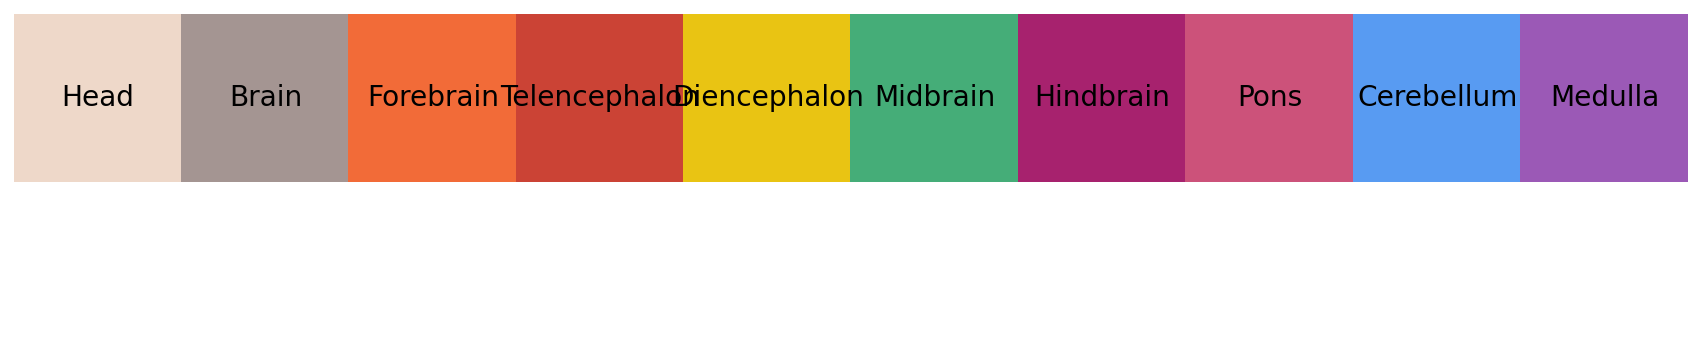

In [13]:
cgplot.Colorizer("regions").plot()

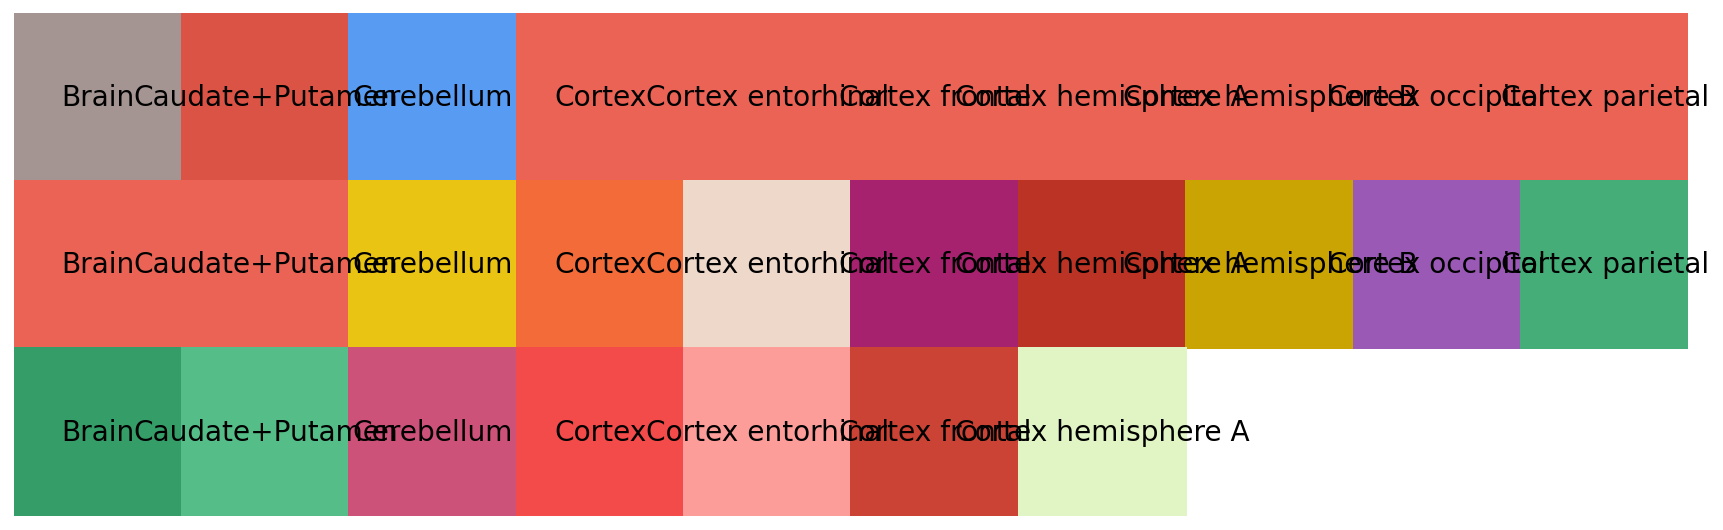

In [14]:
cgplot.Colorizer("subregions").plot()

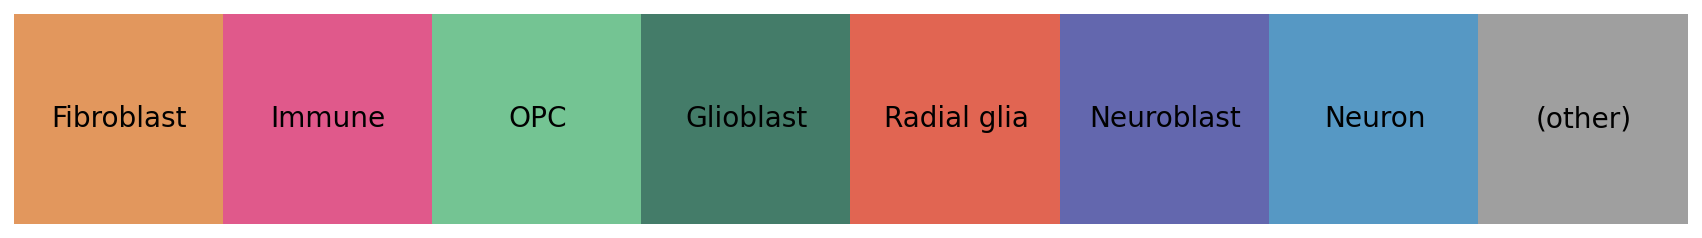

In [15]:
cgplot.Colorizer("classes").plot()

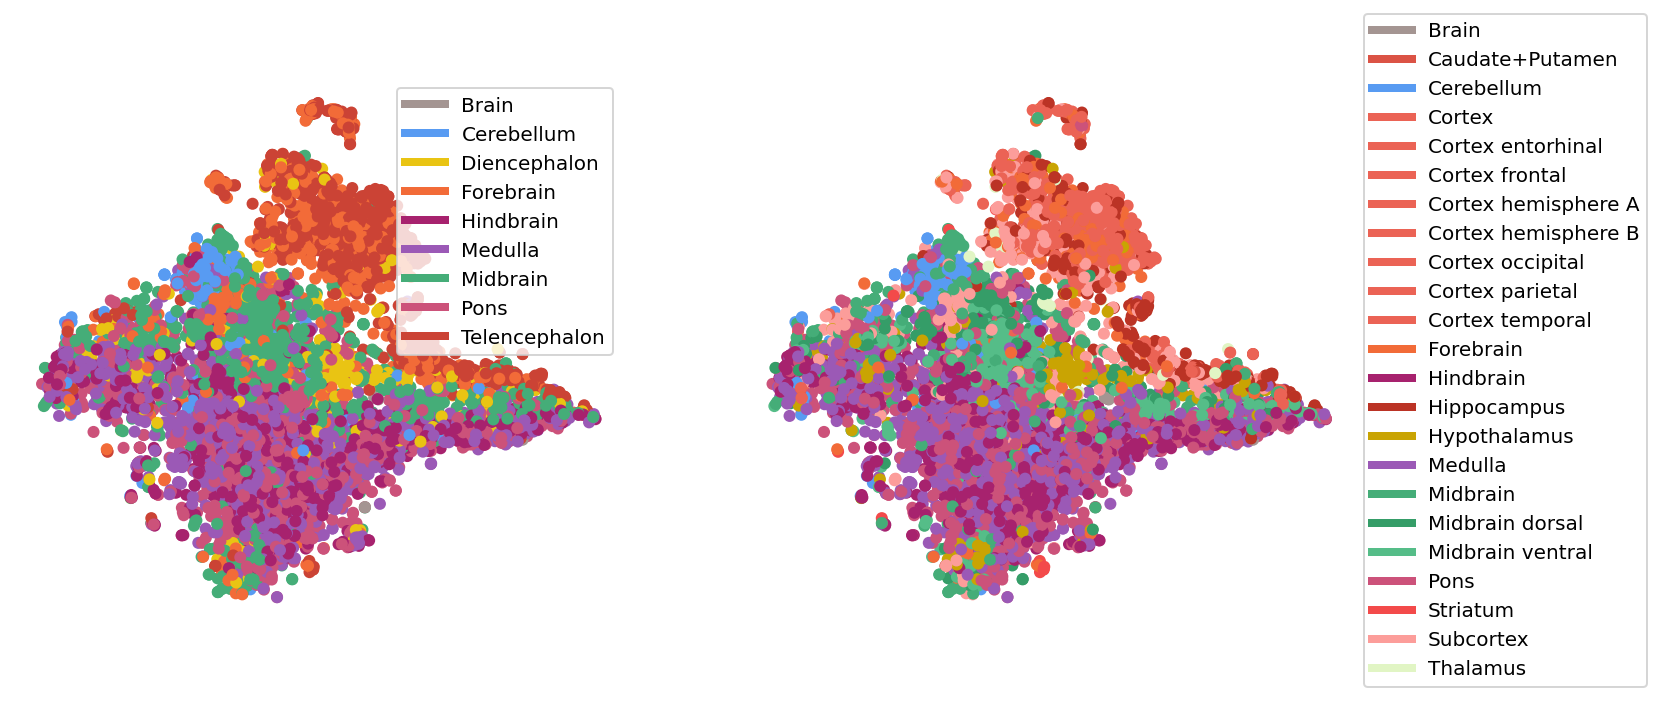

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
cgplot.scatterc(xy, c=regions, colors="regions", legend="upper right")
plt.axis("off")
plt.subplot(122)
cgplot.scatterc(xy, c=subregions, colors="subregions")
plt.axis("off")
None

## 3. Standard colormaps

Similarly, when plotting numerical data, it's important to be consistent between figures so the reader can learn what the colors mean. In addition, it's crucial to use 
consistent ranges, so that the colormap does not shift if some data is missing.

We define these color schemes for standard numerical attributes: **age**

**IMPORTANT**: when using the 'age' color scheme, you must set vmin=5 and vmax=14 for the colors to be consistent (otherwise matplotlib will use the minimum and maximum values of the data)

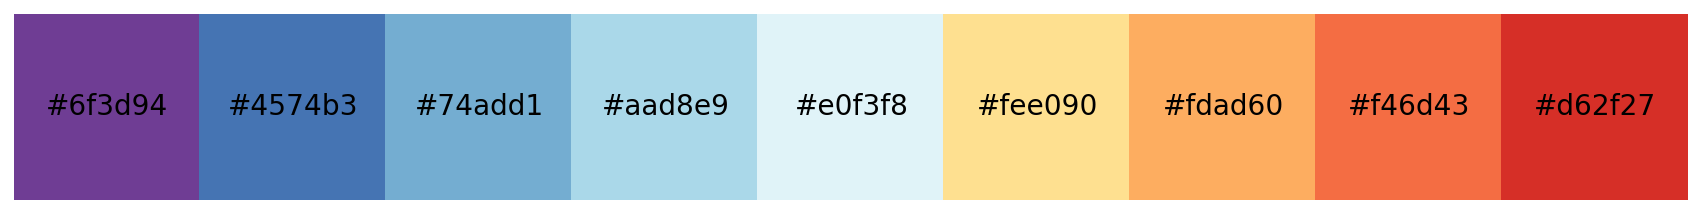

In [17]:
# age: for plotting the age in post-conception weeks
cgplot.Colorizer("age").plot()

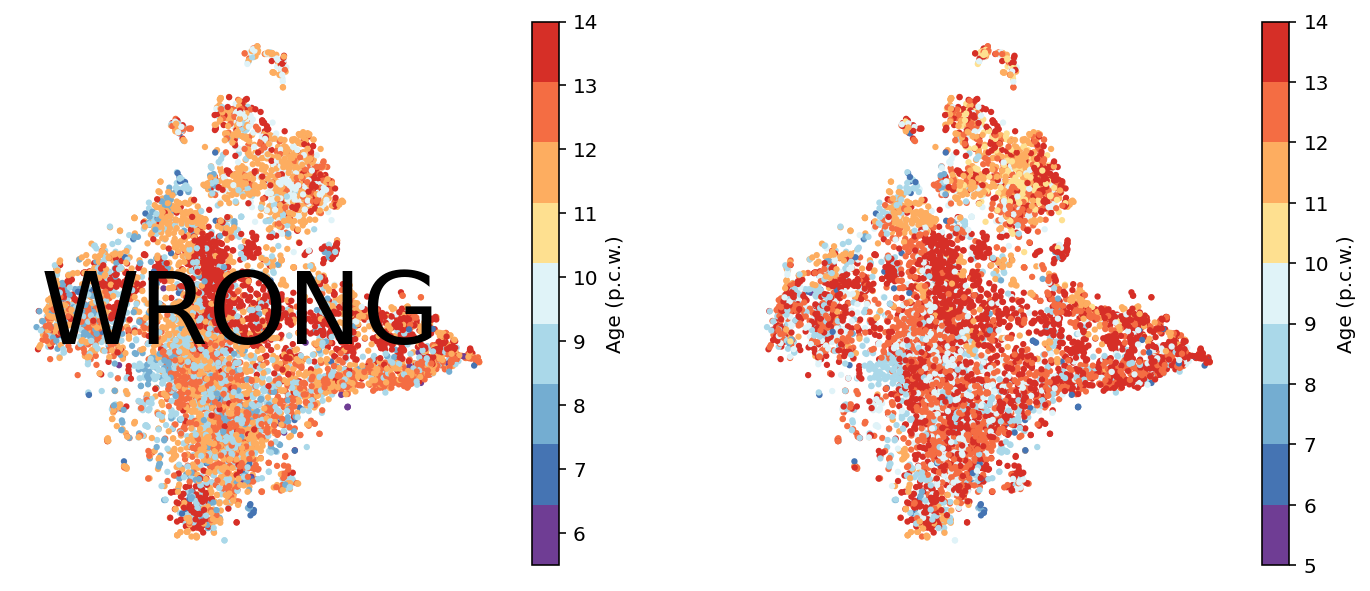

In [18]:
# To use a color scheme as a colormap:
age_cmap = cgplot.Colorizer("age").cmap

plt.figure(figsize=(12,5))
# Wrong approach: forgot the set vmin and vmax
plt.subplot(121)
cgplot.scattern(xy, c=age, cmap=age_cmap, s=10)
plt.colorbar(label="Age (p.c.w.)")
plt.axis("off")
plt.text(0, 0, "WRONG", fontsize="50", ha="center", va="center")
None

plt.subplot(122)
cgplot.scattern(xy, c=age, cmap=age_cmap, vmin=5, vmax=14, s=10)
plt.colorbar(label="Age (p.c.w.)")
plt.axis("off")
None

# Notice how the colorbar ranges from 5 to 14 when setting vmin and vmax properly

## Larger examples

In [19]:
ws = db.builds.sten.humandev20220523.BrainBasic
xy = ws.Embedding[:]
regions = ws.Region[:]
age = ws.Age[:]

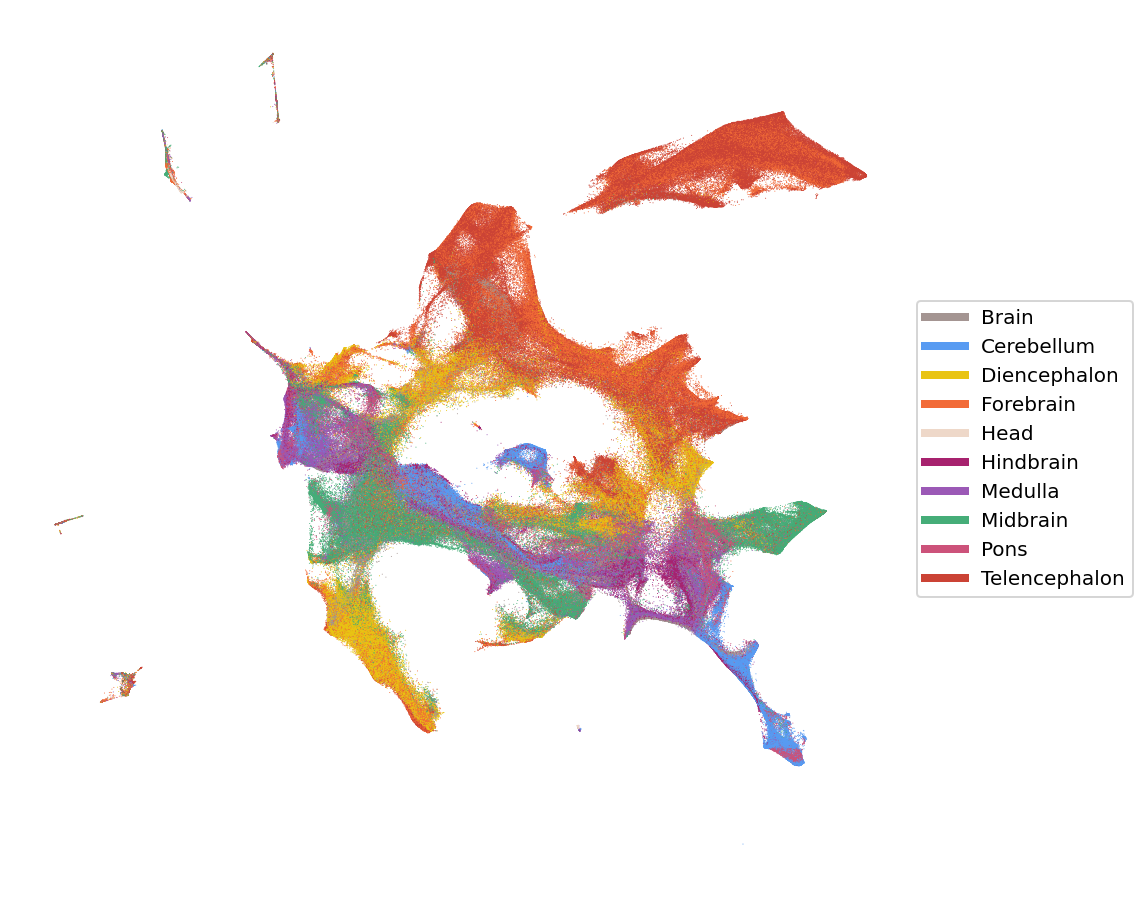

In [19]:
plt.figure(figsize=(8,8))
cgplot.scatterc(xy, c=regions, colors="regions", s=0.25)
plt.axis("off")
None

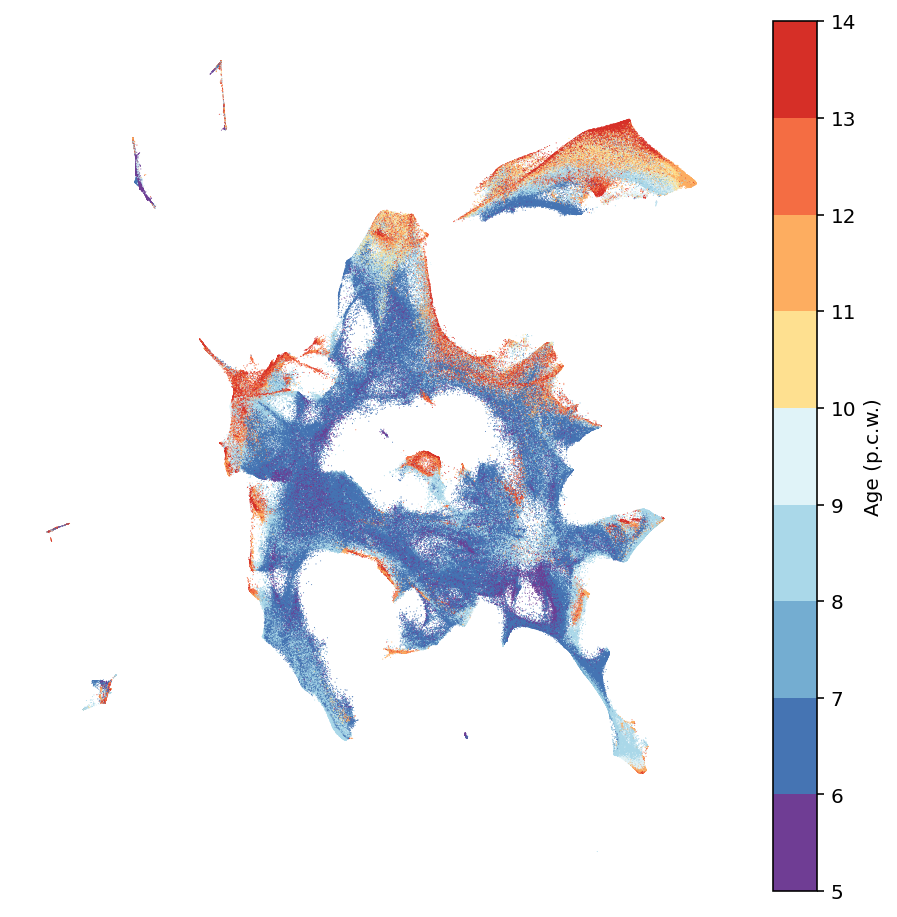

In [22]:
plt.figure(figsize=(8,8))
cgplot.scattern(xy, c=age, cmap=cgplot.Colorizer("age").cmap, vmin=5, vmax=14, lw=0, s=0.25)
plt.colorbar(ticks=range(5,16), label="Age (p.c.w.)")
plt.axis("off")
None

Legends for figures are in Dropbox: ".../Manuscripts/Human_brain_development/Figures/Colorbars.ai":

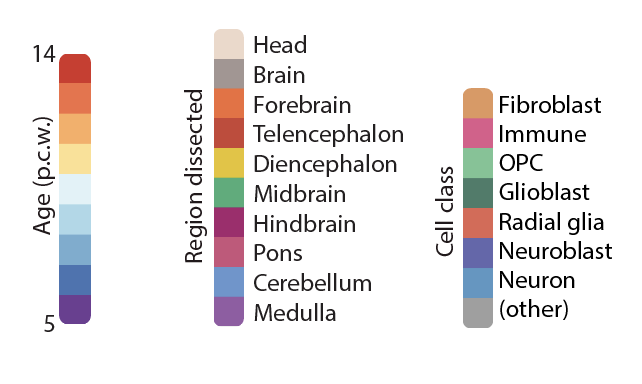